#🧾 Entrega final:
*   Amahia Guadalupe Lucía Páez
*   Comisión: *25262*



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

# Etapa 1

### Punto 1: carga de datos

In [97]:
ruta_clientes =pd.read_csv("/content/drive/MyDrive/datasets_talento/clientes.csv")
ruta_marketing = pd.read_csv("/content/drive/MyDrive/datasets_talento/marketing.csv")
ruta_ventas = pd.read_csv("/content/drive/MyDrive/datasets_talento/ventas.csv")


In [109]:
def cargar_datasets(ruta_clientes, ruta_ventas, ruta_marketing):
    try:
        clientes = pd.read_csv(ruta_clientes)
        ventas = pd.read_csv(ruta_ventas)
        marketing = pd.read_csv(ruta_marketing)
        print("Datasets cargados correctamente.\n")
        return clientes, ventas, marketing
    except FileNotFoundError:
        print(" Error: alguna de las ruta no existe.")
    except Exception as e:
        print("Error:", e)

In [101]:
def mostrar_dimensiones(df, nombre):
    print(f"{'='*50}")
    print(f"Dataset: {nombre}")
    print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")
    print(f"{'='*50}")

mostrar_dimensiones(clientes, "Clientes")
mostrar_dimensiones(ventas, "Ventas")
mostrar_dimensiones(marketing, "Marketing")


Dataset: Clientes
Filas: 567 | Columnas: 5
Dataset: Ventas
Filas: 3035 | Columnas: 6
Dataset: Marketing
Filas: 90 | Columnas: 6


### Punto2:  Script básico

In [17]:
def calcular_venta_total(precio, cantidad):
    return precio * cantidad

In [18]:
precios_mes = [1200, 3500, 2400]
cantidades_mes = [2, 1, 3]
venta_total_mes = sum([calcular_venta_total(p,c) for p,c in zip(precios_mes,cantidades_mes)])
print('Venta total del mes (ejemplo manual):', venta_total_mes)

Venta total del mes (ejemplo manual): 13100


### Punto 3: Estructura de datos

In [21]:
ventas_registro = []

def agregar_venta_registro(producto, precio, cantidad):
    venta = {'producto': producto, 'precio': float(precio), 'cantidad': int(cantidad), 'total': float(precio)*int(cantidad)}
    ventas_registro.append(venta)

In [40]:
# ejeplo de registo
agregar_venta_registro('heladera', 120000, 1)
agregar_venta_registro('tele', 180000, 2)
print('ejemplo:', ventas_registro)

ejemplo: [{'producto': 'heladera', 'precio': 120000.0, 'cantidad': 1, 'total': 120000.0}, {'producto': 'televisor', 'precio': 180000.0, 'cantidad': 2, 'total': 360000.0}, {'producto': 'heladera', 'precio': 120000.0, 'cantidad': 1, 'total': 120000.0}, {'producto': 'tele', 'precio': 180000.0, 'cantidad': 2, 'total': 360000.0}]


### Punto 4: EDA

In [35]:
def exploracion_inicial_EDA(df, nombre):
    print(f"--- {nombre} ---")
    print('Forma:', df.shape)
    print('Tipos:')
    print(df.dtypes)
    print('Nulos por columna:')
    print(df.isnull().sum())
    print('Primeras filas:')
    display(df.head())
    print('Describe (numérico):')
    display(df.describe(include='number'))

In [37]:
exploracion_inicial_EDA(ventas, 'VENTAS')

--- VENTAS ---
Forma: (3035, 6)
Tipos:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object
Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64
Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


In [38]:
exploracion_inicial_EDA(clientes, 'CLIENTES')

--- CLIENTES ---
Forma: (567, 5)
Tipos:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64
Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


In [39]:
exploracion_inicial_EDA(marketing, 'MARKETING')

--- MARKETING ---
Forma: (90, 6)
Tipos:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object
Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64
Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


### Punto 5:Calidad de datos

In [45]:
def revisar_calidad_de_datos(data, dataNombre):
    print(f"------------- Dataset de {dataNombre} -------------")
    duplicados = data.duplicated().sum()
    print(f"Cantidad de duplicados: {duplicados}")
    print("----------------------------------------")
    tipos_de_datos = data.dtypes;
    nulos = data.isnull().sum();
    porcentaje_nulos = (nulos / len(data)) *100;
    unicos = data.nunique();

    reporte = pd.DataFrame({
        "Tipo de dato": tipos_de_datos,
        "Cantidad de nulos": nulos,
        "Porcentaje de nulos": porcentaje_nulos,
        "Cantidad de valores unicos": unicos
    })
    return reporte;



In [42]:
revisar_calidad_de_datos(clientes, "Clientes")

------------- Dataset de Clientes -------------
Cantidad de duplicados: 0
----------------------------------------


,Tipo de dato,Cantidad de nulos,Porcentaje de nulos,Cantidad de valores unicos
id_cliente,int64,0,0.0,567
nombre,object,0,0.0,567
edad,int64,0,0.0,49
ciudad,object,0,0.0,12
ingresos,float64,0,0.0,547


In [43]:
revisar_calidad_de_datos(ventas, "Ventas")

------------- Dataset de Ventas -------------
Cantidad de duplicados: 35
----------------------------------------


,Tipo de dato,Cantidad de nulos,Porcentaje de nulos,Cantidad de valores unicos
id_venta,int64,0,0.000000,3000
producto,object,0,0.000000,30
precio,object,2,0.065898,2590
cantidad,float64,2,0.065898,12
fecha_venta,object,0,0.000000,364
categoria,object,0,0.000000,3


In [44]:
revisar_calidad_de_datos(marketing, "Marketing")

------------- Dataset de Marketing -------------
Cantidad de duplicados: 0
----------------------------------------


,Tipo de dato,Cantidad de nulos,Porcentaje de nulos,Cantidad de valores unicos
id_campanha,int64,0,0.0,90
producto,object,0,0.0,30
canal,object,0,0.0,3
costo,float64,0,0.0,81
fecha_inicio,object,0,0.0,78
fecha_fin,object,0,0.0,78


# Etapa 2



### Punto 1:Limpieza de texto

In [51]:
def normalizar_texto(texto):
  if not isinstance(texto, str):
    return texto;
  texto = texto.lower();
  reemplazos = {
        "á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u",
        "ä": "a", "ë": "e", "ï": "i", "ö": "o", "ü": "u",
        "ñ": "n"
  }
  for acento, sin_acento in reemplazos.items():
      texto = texto.replace(acento, sin_acento);
  texto = texto.strip();
  return texto;


In [50]:
def limpiar_datos(df, columnas_texto=None):
    df = df.copy()
    df = df.drop_duplicates()
    if columnas_texto:
        for col in columnas_texto:
            if col in df.columns:
                df[col] = df[col].astype(str).apply(normalizar_texto)
    return df
display(marketing_limpio.head())

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,tv,4.81,20/03/2024,03/05/2024
1,12,Tablet,rrss,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,rrss,6.37,29/03/2024,16/05/2024
4,58,Alfombra,email,4.25,31/03/2024,05/05/2024


### Punto2 : Transformación de datos

In [53]:
def limpiar_precio(df, nombre_col='precio'):
    df = df.copy()
    if nombre_col in df.columns:
        df[nombre_col] = df[nombre_col].astype(str).str.replace('$','', regex=False).str.replace(',','',regex=False).str.strip()
        df[nombre_col] = pd.to_numeric(df[nombre_col], errors='coerce')
    return df

In [56]:
def convertir_fechas(df, lista_columnas):
    df = df.copy()
    for c in lista_columnas:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], dayfirst=True, errors='coerce')
    return df

In [57]:
def agregar_ingreso_total(df, col_precio='precio', col_cantidad='cantidad'):
  df = df.copy()
  if col_precio in df.columns and col_cantidad in df.columns:
      df['ingreso_total'] = df[col_precio] * df[col_cantidad]
  return df

In [60]:
ventas_limpio = limpiar_datos(ventas, ['producto','categoria'])


In [74]:
ventas_limpio = limpiar_precio(ventas_limpio,'precio')
print(ventas_limpio.head())

   id_venta           producto  precio  cantidad fecha_venta  \
0       792  cuadro decorativo   69.94       5.0  2024-01-02   
1       811    lampara de mesa  105.10       5.0  2024-01-02   
2      1156           secadora   97.96       3.0  2024-01-02   
3      1372           heladera  114.35       8.0  2024-01-02   
4      1546           secadora  106.21       4.0  2024-01-02   

           categoria  ingreso_total  
0         decoracion         349.70  
1         decoracion         525.50  
2  electrodomesticos         293.88  
3  electrodomesticos         914.80  
4  electrodomesticos         424.84  


In [62]:
 ventas_limpio = convertir_fechas(ventas_limpio, ['fecha_venta'])

In [73]:
ventas_limpio = limpiar_precio(ventas_limpio,'precio')
ventas_limpio = agregar_ingreso_total(ventas_limpio)
print(ventas_limpio.head())

   id_venta           producto  precio  cantidad fecha_venta  \
0       792  cuadro decorativo   69.94       5.0  2024-01-02   
1       811    lampara de mesa  105.10       5.0  2024-01-02   
2      1156           secadora   97.96       3.0  2024-01-02   
3      1372           heladera  114.35       8.0  2024-01-02   
4      1546           secadora  106.21       4.0  2024-01-02   

           categoria  ingreso_total  
0         decoracion         349.70  
1         decoracion         525.50  
2  electrodomesticos         293.88  
3  electrodomesticos         914.80  
4  electrodomesticos         424.84  


### Punto 2: Agregación

In [105]:
def agregacion_por_categoria(df, col_categoria='categoria'):
  df = df.copy()
  resumen = df.groupby(col_categoria).agg(
      ingreso_total = ('ingreso_total','sum'),
      unidades = ('cantidad','sum'),
      ventas = ('ingreso_total','size'),
      precio_promedio = ('precio','mean')
  ).reset_index().sort_values('ingreso_total', ascending=False)
  resumen['ticket_promedio'] = resumen['ingreso_total'] / resumen['ventas']
  return resumen

In [72]:
resumen_cat = agregacion_por_categoria(ventas_limpio)
print(resumen_cat)

           categoria  ingreso_total  unidades  ventas  precio_promedio  \
1  electrodomesticos      505299.63    6592.0    1000         76.52096   
2        electronica      482577.80    6413.0     999         75.25492   
0         decoracion      479216.09    6490.0    1001         74.09800   

   ticket_promedio  
1       505.299630  
2       483.060861  
0       478.737353  


In [69]:
def agregacion_por_categoria(df, col_categoria='categoria'):
  df = df.copy()
  resumen = df.groupby(col_categoria).agg(
      ingreso_total = ('ingreso_total','sum'),
      unidades = ('cantidad','sum'),
      ventas = ('ingreso_total','size'),
      precio_promedio = ('precio','mean')
  ).reset_index().sort_values('ingreso_total', ascending=False)
  resumen['ticket_promedio'] = resumen['ingreso_total'] / resumen['ventas']
  return resumen

### Punto 4: Integración

In [75]:
def integrar_ventas_marketing(ventas_df, marketing_df, clave='producto'):
    v = ventas_df.copy()
    m = marketing_df.copy()
    # normalizar clave
    v[clave] = v[clave].astype(str).apply(normalizar_texto)
    m[clave] = m[clave].astype(str).apply(normalizar_texto)
    integrado = v.merge(m, how='left', on=clave, suffixes=('_venta','_marketing'))
    return integrado

In [77]:
integrado = integrar_ventas_marketing(ventas_limpio, marketing_limpio)
print(integrado.head())

   id_venta           producto  precio  cantidad fecha_venta   categoria  \
0       792  cuadro decorativo   69.94       5.0  2024-01-02  decoracion   
1       792  cuadro decorativo   69.94       5.0  2024-01-02  decoracion   
2       792  cuadro decorativo   69.94       5.0  2024-01-02  decoracion   
3       811    lampara de mesa  105.10       5.0  2024-01-02  decoracion   
4       811    lampara de mesa  105.10       5.0  2024-01-02  decoracion   

   ingreso_total  id_campanha  canal  costo fecha_inicio   fecha_fin  
0          349.7            1   rrss   5.27   27/04/2024  04/06/2024  
1          349.7           31  email   5.28   15/08/2024  12/09/2024  
2          349.7           61     tv   5.30   05/11/2024  23/12/2024  
3          525.5           32  email   5.54   28/03/2024  20/04/2024  
4          525.5            2   rrss   5.88   30/05/2024  29/06/2024  


# Etapa 3


### Punto 1: estadistica descriptiva

In [83]:
def estadistica_descriptiva(df, col='ingreso_total'):
    s = df[col].dropna()
    resumen = {
        'media': float(s.mean()),
        'mediana': float(s.median()),
        'moda': list(s.mode().values),
        'desviacion_estandar': float(s.std()),
          'varianza': float(s.var()),
        'minimo': float(s.min()),
        'maximo': float(s.max()),
        'iqr': float(s.quantile(0.75) - s.quantile(0.25))}
    return resumen

In [84]:
estadistica_descriptiva(ventas_limpio)

{'media': 489.35741160773847,
 'mediana': 418.065,
 'moda': [np.float64(345.33), np.float64(1058.31)],
 'desviacion_estandar': 334.28181669305616,
 'varianza': 111744.33297160998,
 'minimo': 26.3,
 'maximo': 1488.1200000000001,
 'iqr': 489.00000000000006}

### Punto 2 : EDA con visualización

In [85]:
def grafico_series_mensual(ventas_mes):
    plt.figure(figsize=(10,5))
    ventas_mes.plot(marker='o')
    plt.title('Ingresos por mes')
    plt.xlabel('Mes')
    plt.ylabel('Ingreso total')
    plt.grid(True)
    plt.show()

In [87]:
def grafico_dispersion(df):
    plt.figure(figsize=(8,6))
    plt.scatter(df['precio'], df['cantidad'], alpha=0.6)
    plt.title('precio vs cantidad')
    plt.xlabel('precio')
    plt.ylabel('cantidad')
    plt.show()

In [ ]:
def boxplot_categoria(df):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='categoria', y='ingreso_total', data=df)
    plt.xticks(rotation=45)
    plt.title('Ingreso por categoría (distribución)')
    plt.show()

### Punto 3:correlacion

In [88]:
def correlacion_precio_cantidad(df):
    dfc = df[['precio','cantidad']].dropna()
    corr = dfc.corr().loc['precio','cantidad']
    return corr

In [89]:
correlacion_precio_cantidad(ventas_limpio)

np.float64(-0.0023884773740347927)

### Punto 4: consolidaicón

In [90]:
def preparar_dataset_final(integrado_df):
    df = integrado_df.copy()
    df['mes'] = df['fecha_venta'].dt.to_period('M').dt.to_timestamp()
    resumen = df.groupby(['mes','producto']).agg(
        unidades = ('cantidad','sum'),
        ingreso_total = ('ingreso_total','sum'),
        canal = ('canal','first')
    ).reset_index()
    return resumen

In [91]:
resumen_final = preparar_dataset_final(integrado)

# Etapa 4

### Punto 1: visualización con matploit

In [92]:
def grafico_barras_top_productos(resumen_final, top_n=10):
    top = resumen_final.groupby('producto')['ingreso_total'].sum().reset_index().sort_values('ingreso_total', ascending=False).head(top_n)
    plt.figure(figsize=(12,6))
    plt.bar(top['producto'], top['ingreso_total'])
    plt.xticks(rotation=90)
    plt.title('Top productos por ingreso')
    plt.show()

### Punto 2: Visualizacion estadistica con seaborn

In [93]:
def heatmap_correlaciones(df):
    plt.figure(figsize=(6,5))
    sns.heatmap(df[['precio','cantidad','ingreso_total']].corr(), annot=True)
    plt.title('Mapa de correlación')
    plt.show()

### Punto 3: dashboard plotly

In [94]:
def dashboard_plotly(resumen_final):
    serie = resumen_final.groupby('mes')['ingreso_total'].sum().reset_index()
    fig = px.line(serie, x='mes', y='ingreso_total', title='Ingresos Totales por Mes')
    fig.show()
    top = resumen_final.groupby('producto')['ingreso_total'].sum().reset_index().sort_values('ingreso_total', ascending=False).head(10)
    fig2 = px.bar(top, x='producto', y='ingreso_total', title='Top 10 Productos por Ingresos')
    fig2.show()

### Punto4: presentación final

In [126]:
def texto_presentacion_final():
    texto = '''
    Entrega Final - Data Analytics

    Se realizó un análisis integral utilizando tres datasets principales: ventas, clientes y marketing.
    El proceso incluyó la carga, limpieza, transformación, integración y análisis de los datos con el objetivo de obtener información relevante para la toma de decisiones.

    Etapa 1 — Recopilación y Preparación
    - Se cargaron los datasets proporcionados y se exploró su estructura inicial.
    - Se identificaron valores nulos, duplicados y posibles inconsistencias.
    - Se desarrolló un script básico para calcular ventas utilizando variables y operadores.
    - Se implementaron estructuras de datos simples (listas y diccionarios) para representar transacciones manuales.

    Etapa 2 — Limpieza y Transformación
    - Se normalizaron textos eliminando tildes, formatos inconsistentes y valores fuera de estándar.
    - Se convirtió la columna de precio a valores numéricos.
    - Se procesaron las fechas y se creó la variable ingreso_total (precio * cantidad).
    - Se generaron agregaciones por producto y por categoría.
    - Se identificaron productos de alto rendimiento, definidos como el Top 20% de ingresos.
    - Se integró la información de ventas y marketing para analizar el impacto del canal.

    Etapa 3 — Análisis de Datos
    - Se calcularon medidas estadísticas como media, mediana, moda, varianza, desviación estándar e IQR.
    - Se realizaron visualizaciones exploratorias identificando tendencias mensuales.
    - Se analizó la correlación entre precio y cantidad, encontrando patrones que ayudan a comprender el comportamiento del cliente.
    - Se consolidó un dataset final que resume ventas por mes y por producto, listo para estrategias de negocio.

    Etapa 4 — Visualización y Presentación
    - Se generaron gráficos utilizando Matplotlib (líneas, barras y dispersión).
    - Se desarrollaron visualizaciones avanzadas en Seaborn (boxplots y mapa de calor).
    - Se creó un dashboard interactivo en Plotly para explorar ingresos por mes y productos más vendidos.
    - Finalmente, se preparó esta presentación como resumen para el panel de “expertos” de SynthData.

    Hallazgos e Insights Principales
    - Los productos del Top 20% concentran la mayor parte del ingreso total.
    - Las ventas muestran variaciones mensuales claras, con picos en determinados períodos del año.
    - Algunas categorías tienen mayor estabilidad de demanda que otras.
    - Los canales de marketing como RRSS aparecen asociados a productos de alta rotación.
    -La correlación entre precio y cantidad es débil/moderada, lo que sugiere que factores adicionales influyen más que el precio.


    Archivos en la carpeta de Drive:
    - ventas.csv (original) - dataset original
    - clientes.csv (original) - dataset original
    - marketing.csv (original) - dataset original
    - ventas_limpio.csv - dataset limpio
    - clientes_limpio.csv - dataset limpio
    - marketing_limpio.csv - dataset limpio
    - resumen_final.csv- consolidación final

    _____ CONCLUSION FINAL _____
    El proyecto permitió aplicar todas las etapas del proceso de análisis de datos: carga, exploración, limpieza, transformación, análisis y visualización. El resultado final ofrece información valiosa para comprender el comportamiento de ventas y el impacto de las campañas, sentando una base sólida para futuras decisiones estratégicas.



    '''
    return texto


print(texto_presentacion_final())


    Entrega Final - Data Analytics
    
    Se realizó un análisis integral utilizando tres datasets principales: ventas, clientes y marketing.
    El proceso incluyó la carga, limpieza, transformación, integración y análisis de los datos con el objetivo de obtener información relevante para la toma de decisiones.
     
    Etapa 1 — Recopilación y Preparación
    - Se cargaron los datasets proporcionados y se exploró su estructura inicial.
    - Se identificaron valores nulos, duplicados y posibles inconsistencias.
    - Se desarrolló un script básico para calcular ventas utilizando variables y operadores.
    - Se implementaron estructuras de datos simples (listas y diccionarios) para representar transacciones manuales.

    Etapa 2 — Limpieza y Transformación

Se normalizaron textos eliminando tildes, formatos inconsistentes y valores fuera de estándar.

Se convirtió la columna de precio a valores numéricos.

Se procesaron las fechas y se creó la variable ingreso_total (precio * ca

# Programa principal

#### Cargar datos

In [116]:
clientes = ruta_clientes
ventas = ruta_ventas
marketing = ruta_marketing
cargar_datasets(clientes, ventas, marketing)

Error: argument of type 'method' is not iterable


#### Exploracion inicial

In [119]:
exploracion_inicial_EDA(ventas, 'VENTAS ') #original
exploracion_inicial_EDA(clientes, 'CLIENTES ') #original
exploracion_inicial_EDA(marketing, 'MARKETING ') #original

--- VENTAS  ---
Forma: (3035, 6)
Tipos:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object
Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64
Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


--- CLIENTES  ---
Forma: (567, 5)
Tipos:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64
Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


--- MARKETING  ---
Forma: (90, 6)
Tipos:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object
Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64
Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


#### Limpieza

In [120]:
ventas_limpio = limpiar_datos(ventas, ['producto','categoria'])
ventas_limpio = limpiar_precio(ventas_limpio,'precio')
ventas_limpio = convertir_fechas(ventas_limpio, ['fecha_venta'])
ventas_limpio = agregar_ingreso_total(ventas_limpio)
clientes_limpio = limpiar_datos(clientes, ['nombre','ciudad'])
marketing_limpio = limpiar_datos(marketing, ['producto','canal'])
marketing_limpio = convertir_fechas(marketing_limpio, ['fecha_inicio','fecha_fin'])

#### Agregacion

In [121]:
ventas_perf = ventas_limpio.copy()
resumen_prod = (
ventas_perf
.groupby('producto', as_index=False)
.agg(ingreso_total=('ingreso_total','sum'), unidades=('cantidad','sum'), precio_promedio=('precio','mean'), registros=('ingreso_total','size'))
)
p80_ingreso = resumen_prod['ingreso_total'].quantile(0.80)
ventas_top = resumen_prod.query('ingreso_total >= @p80_ingreso')

#### agregacion por categorua

In [122]:
resumen_cat = agregacion_por_categoria(ventas_limpio)

#### Integracion y dataset final

In [123]:
integrado = integrar_ventas_marketing(ventas_limpio, marketing_limpio)
resumen_final = preparar_dataset_final(integrado)

#### Estadistica y visualizaciones

Estadísticas básicas:  {'media': 489.35741160773847, 'mediana': 418.065, 'moda': [np.float64(345.33), np.float64(1058.31)], 'desviacion_estandar': 334.28181669305616, 'varianza': 111744.33297160998, 'minimo': 26.3, 'maximo': 1488.1200000000001, 'iqr': 489.00000000000006}


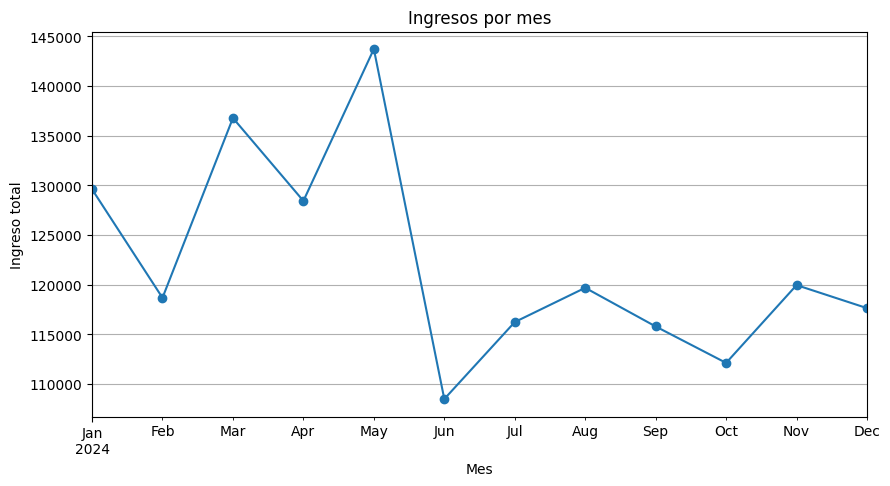

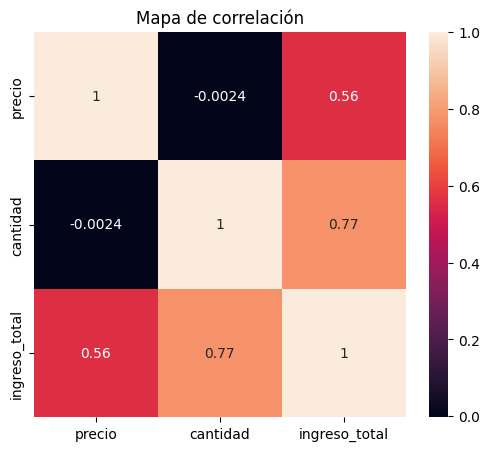

In [124]:
estad = estadistica_descriptiva(ventas_limpio)
print('Estadísticas básicas: ', estad)

ventas_mes = ventas_limpio.groupby(ventas_limpio['fecha_venta'].dt.to_period('M'))['ingreso_total'].sum()
ventas_mes.index = ventas_mes.index.to_timestamp()
grafico_series_mensual(ventas_mes)
heatmap_correlaciones(ventas_limpio)
dashboard_plotly(resumen_final)

#### Guardar datasets ya limpios y resumidos

In [125]:
ventas_limpio.to_csv('/content/drive/MyDrive/data_talento_limpio/ventas_limpio.csv', index=False)
clientes_limpio.to_csv('/content/drive/MyDrive/data_talento_limpio/clientes_limpio.csv', index=False)
marketing_limpio.to_csv('/content/drive/MyDrive/data_talento_limpio/marketing_limpio.csv', index=False)
resumen_final.to_csv('/content/drive/MyDrive/data_talento_limpio/resumen_final.csv', index=False)